<a href="https://colab.research.google.com/github/ImenMasmoudiEm/SalesPrevision/blob/main/Demand_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exloratory Data Analisys

###In our coding we chose to work on google colab for few reasons:
* We can collaborate on the code together on this online environment.
* Here on colab we have amazing features like GPU accelerators, the access we have is still limited but it gives us enough resources to do the work!
* We can link the colab environment to Drive, where we stored our data and where we are intending to store the model h5 file.
* Here we can have code cells and text cells: that enables us to write commants on the code created, which is very helpful when it comes to collaborating and to having reminders to yourself on what you were thinking when writing the code.


###In our pipeline we started with connecting the environment to the drive and then accessing to the data, the commas seperated valies file, and then we did some data preprocessing. After that we Plotted some figures and figured out that the products sales are on diffrent scales, that is why we normalized the data so we can make more accurate conclusions. And then we went to the data preparation for the model where we windowed it. We then prepared the model and trained it on the data. After that we made some paramere tuening where we changed the parameters of the model, added some layers to better the performance. At last we tried to predict some valiues for the upcoming two months.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/PFA||') 
os.getcwd()

'/content/drive/MyDrive/PFA||'

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/PFA||/time series henkel Mirror.csv')

In [ ]:
data.head(42)

,Mois_année,P1,P2,P3,P4,P5,P6,Time
0,January'18,"32,900","29,458","8,553","6,484","6,825","5,961",1
1,February'18,"26,429","11,128","8,632","7,894","5,840","8,541",2
2,March'18,"23,141","31,258","4,162","7,731","5,467","8,034",3
3,April'18,"23,680","25,211","3,348","2,235","6,548","2,583",4
4,May'18,"31,372","23,133","4,112","3,069","5,764","1,784",5
5,June'18,"25,779","29,350","4,739","5,051","5,877","5,581",6
6,July'18,"40,552","29,187","1,838","1,528","1,092","2,649",7
7,August'18,"35,702","33,895","3,000","2,711","3,461","7,065",8
8,Sept'18,"33,193","35,864","12,659","7,192","8,179","5,037",9
9,Oct'18,"31,012","29,751","5,424","2,603","3,528","2,378",10


In [ ]:
for col in data.columns:
  data[col]=data[col].replace(",", "")
data.head(4)
#if this didn't work, just add .str to [data[col].str.replace(",", "")] 
#the run it! I will make an error. but then when you remove the .str and run again it will magically work!
#Correlations P/P, hypothéses (explications corona appeared, crises mondiale why the phenomena happened, it's logical, makes sens)
#Preprocessing: Dirty data --> Clean data + splitting data into bins (watch youtub)

,Mois_année,P1,P2,P3,P4,P5,P6,Time
0,January'18,"32,900","29,458","8,553","6,484","6,825","5,961",1
1,February'18,"26,429","11,128","8,632","7,894","5,840","8,541",2
2,March'18,"23,141","31,258","4,162","7,731","5,467","8,034",3
3,April'18,"23,680","25,211","3,348","2,235","6,548","2,583",4


In [ ]:
for col in data.columns:
  data[col]=data[col].str.replace(",", "")
data.head(12)

In [ ]:
for col in data.columns:
  data[col]=data[col].replace(",", "")
data.head(4)

,Mois_année,P1,P2,P3,P4,P5,P6,Time
0,January'18,32900,29458,8553,6484,6825,5961,1
1,February'18,26429,11128,8632,7894,5840,8541,2
2,March'18,23141,31258,4162,7731,5467,8034,3
3,April'18,23680,25211,3348,2235,6548,2583,4


###After seeing the first 12 rows of our data, we noticed that there were unwanted commas that seperated the thousands and the hundreads. To remove them we executed this three parts seperated code cells and now we have the right number forms we need to move forward.

##Numerizing the data

In [ ]:
data["P1"]=data["P1"].astype("float")
data["P2"]=data["P2"].astype("float")
data["P3"]=data["P3"].astype("float")
data["P4"]=data["P4"].astype("float")
data["P5"]=data["P5"].astype("float")
data["P6"]=data["P6"].astype("float")

###After reading the data and removing the commas, we see that the data's type is string. When plotting the graphs we need numbers that is why we converted the data type to float. Later on we will be doing more complex things with data preparation for the model and that is one other reason why we need them to be numerical.

##Plotting the data

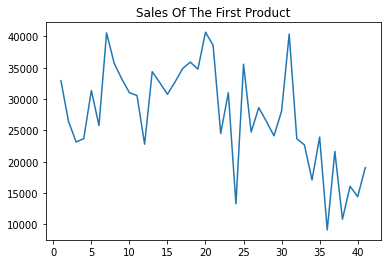

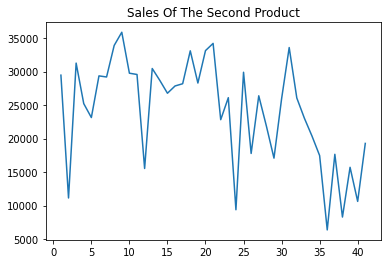

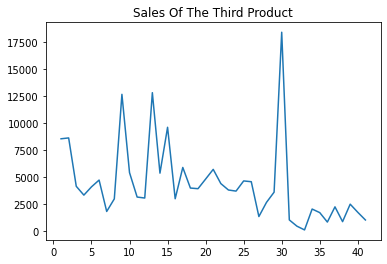

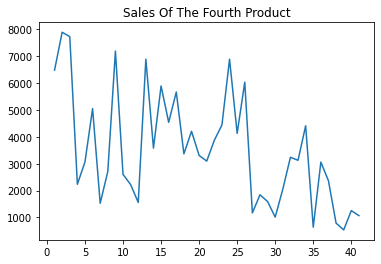

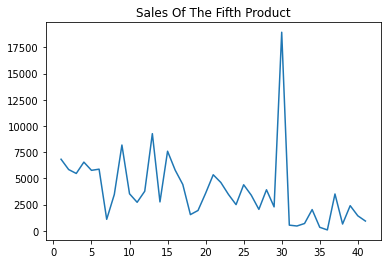

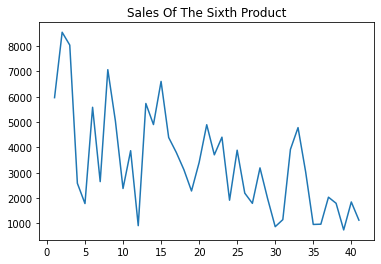

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(data['Time'],data['P1'])
plt.title("Sales Of The First Product")
plt.show()
plt.plot(data['Time'],data['P2'])
plt.title("Sales Of The Second Product")
plt.show()
plt.plot(data['Time'],data['P3'])
plt.title("Sales Of The Third Product")
plt.show()
plt.plot(data['Time'],data['P4'])
plt.title("Sales Of The Fourth Product")
plt.show()
plt.plot(data['Time'],data['P5'])
plt.title("Sales Of The Fifth Product")
plt.show()
plt.plot(data['Time'],data['P6'])
plt.title("Sales Of The Sixth Product")
plt.show()

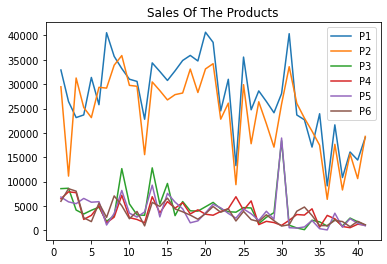

In [ ]:
plt.plot(data['Time'],data['P1'],label="P1")
plt.plot(data['Time'],data['P2'],label="P2")
plt.plot(data['Time'],data['P3'],label="P3")
plt.plot(data['Time'],data['P4'],label="P4")
plt.plot(data['Time'],data['P5'],label="P5")
plt.plot(data['Time'],data['P6'],label="P6")
plt.title("Sales Of The Products")
plt.legend()
plt.show() #Centralize the data to compare! data scaling

###Data Normalization

In [ ]:
from sklearn import preprocessing
import numpy as np
L1=[]
L2=[]
L3=[]
L4=[]
L5=[]
L6=[]
for i in data['P1']:
  L1.append(i)
for i in data['P2']:
  L2.append(i)
for i in data['P3']:
  L3.append(i)
for i in data['P4']:
  L4.append(i)
for i in data['P5']:
  L5.append(i)
for i in data['P6']:
  L6.append(i)

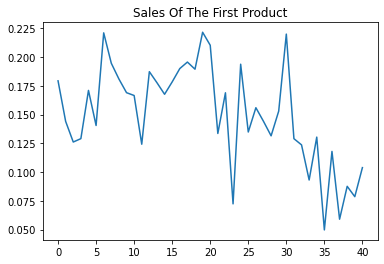

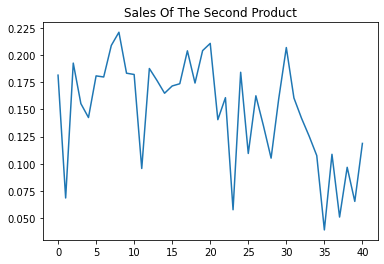

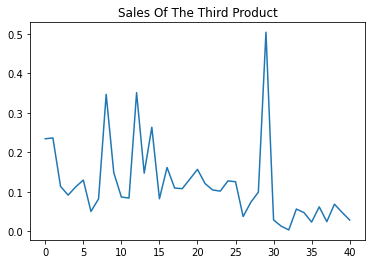

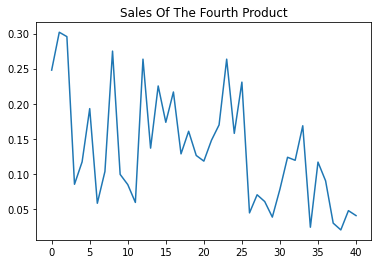

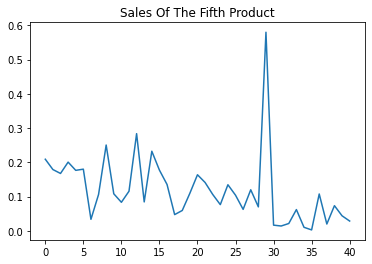

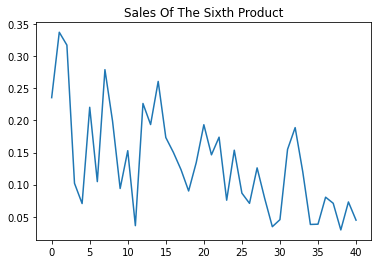

In [ ]:
from sklearn import preprocessing
import numpy as np
P1 = np.array(L1)
P2 = np.array(L2)
P3 = np.array(L3)
P4 = np.array(L4)
P5 = np.array(L5)
P6 = np.array(L6)
P1 = preprocessing.normalize([P1]).reshape(41)
P2 = preprocessing.normalize([P2]).reshape(41)
P3 = preprocessing.normalize([P3]).reshape(41)
P4 = preprocessing.normalize([P4]).reshape(41)
P5 = preprocessing.normalize([P5]).reshape(41)
P6 = preprocessing.normalize([P6]).reshape(41)
plt.plot(P1)
plt.title("Sales Of The First Product")
plt.show()
plt.plot(P2)
plt.title("Sales Of The Second Product")
plt.show()
plt.plot(P3)
plt.title("Sales Of The Third Product")
plt.show()
plt.plot(P4)
plt.title("Sales Of The Fourth Product")
plt.show()
plt.plot(P5)
plt.title("Sales Of The Fifth Product")
plt.show()
plt.plot(P6)
plt.title("Sales Of The Sixth Product")
plt.show()

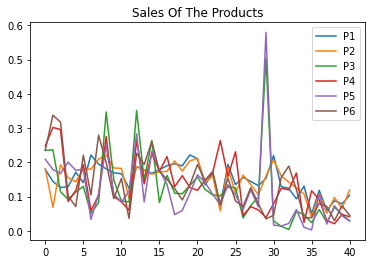

In [ ]:
plt.plot(P1,label="P1")
plt.plot(P2,label="P2")
plt.plot(P3,label="P3")
plt.plot(P4,label="P4")
plt.plot(P5,label="P5")
plt.plot(P6,label="P6")
plt.title("Sales Of The Products")
plt.legend()
plt.show()

###Plotting the correlation matrix

In [ ]:
df = pd.DataFrame(data,columns=['P1','P2','P3','P4','P5','P6'])
corrMatrix = df.corr()
corrMatrix

,P1,P2,P3,P4,P5,P6
P1,1.000000,0.859421,0.327932,0.174983,0.247277,0.343429
P2,0.859421,1.000000,0.312991,0.208455,0.292316,0.424289
P3,0.327932,0.312991,1.000000,0.435807,0.903540,0.326260
P4,0.174983,0.208455,0.435807,1.000000,0.296364,0.710488
P5,0.247277,0.292316,0.903540,0.296364,1.000000,0.265497
P6,0.343429,0.424289,0.326260,0.710488,0.265497,1.000000


###Getting a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib

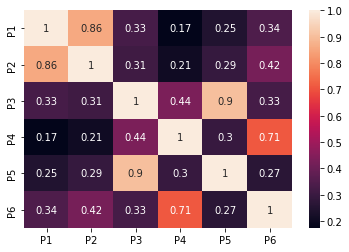

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

###The correlation matrix shows that there are strong correlations between three couples of products: 
* P1 and P2
* P3 and P5
* P4 and P6


###This strong correlation between products can get us deeper, we start getting meaning when we get back to the nature of the products:
* P1 and P2 are both "Nadhif HS Deep Clean 320 Grams" the first is the regular and the second is MS.
* P3 and P5 are both "Dixan LS Powder 4 Kg New" the first is The Regular and the second is MS.
* P4 and P6 are both "Dixan LS Powder 5 Kg New" the first is The Regular and the second is MS.

##Adding date

In [ ]:
def todate(c):
  year=c[-2:]
  month=c[:-3]
  Day=28
  if (month=='January'):
    month='01'
    day="31"
  elif (month=='February'):
    month='02'
    if (float(year)%4 == 0):
      day = '29'
    else:
      day = '28'
  elif (month == 'March'):
    month = '03'
    day = '31'
  elif ( month == 'April'):
    month = '04'
    day = '30'
  elif ( month == 'May'):
    month = '05'
    day = '31'
  elif ( month == 'June'):
    month = '06'
    day = '30'
  elif ( month == 'July'):
    month='07'
    day = '31'
  elif ( month == 'August'):
    month = '08'
    day = '31'
  elif ( month == 'Sept' ):
    month = '09'
    day = '30'
  elif (month == 'Oct'):
    month = '10'
    day = '31'
  elif ( month == 'Nov'):
    month = '11'
    day = '30'
  else:
    month ='12'
    day = '31'
  return day+'/'+month +'/20'+year+' 23:59:59'
print(todate("January'17"))

31/01/2017 23:59:59


In [ ]:
def todate(c):
  year=c[-2:]
  month=c[:-3]
  Day=28
  if (month=='January'):
    month='1'
    day="31"
  elif (month=='February'):
    month='2'
    if (float(year)%4 == 0):
      day = '29'
    else:
      day = '28'
  elif (month == 'March'):
    month = '3'
    day = '31'
  elif ( month == 'April'):
    month = '4'
    day = '30'
  elif ( month == 'May'):
    month = '5'
    day = '31'
  elif ( month == 'June'):
    month = '6'
    day = '30'
  elif ( month == 'July'):
    month='7'
    day = '31'
  elif ( month == 'August'):
    month = '8'
    day = '31'
  elif ( month == 'Sept' ):
    month = '9'
    day = '30'
  elif (month == 'Oct'):
    month = '10'
    day = '31'
  elif ( month == 'Nov'):
    month = '11'
    day = '30'
  else:
    month ='12'
    day = '31'
  return day+'/'+month +'/20'+year+' 23:59:59'
print(todate("January'17"))

31/1/2017 23:59:59


In [ ]:
df = pd.DataFrame(data)

In [ ]:
L=[]
for i in data['Mois_année']:
  L.append(todate(i))

In [ ]:
print(L)

['31/1/2018 23:59:59', '28/2/2018 23:59:59', '31/3/2018 23:59:59', '30/4/2018 23:59:59', '31/5/2018 23:59:59', '30/6/2018 23:59:59', '31/7/2018 23:59:59', '31/8/2018 23:59:59', '30/9/2018 23:59:59', '31/10/2018 23:59:59', '30/11/2018 23:59:59', '31/12/2018 23:59:59', '31/1/2019 23:59:59', '28/2/2019 23:59:59', '31/3/2019 23:59:59', '30/4/2019 23:59:59', '31/5/2019 23:59:59', '30/6/2019 23:59:59', '31/7/2019 23:59:59', '31/8/2019 23:59:59', '30/9/2019 23:59:59', '31/10/2019 23:59:59', '30/11/2019 23:59:59', '31/12/2019 23:59:59', '31/1/2020 23:59:59', '29/2/2020 23:59:59', '31/3/2020 23:59:59', '30/4/2020 23:59:59', '31/5/2020 23:59:59', '30/6/2020 23:59:59', '31/7/2020 23:59:59', '31/8/2020 23:59:59', '30/9/2020 23:59:59', '31/10/2020 23:59:59', '30/11/2020 23:59:59', '31/12/2020 23:59:59', '31/1/2021 23:59:59', '28/2/2021 23:59:59', '31/3/2021 23:59:59', '30/4/2021 23:59:59', '31/5/2021 23:59:59']


In [ ]:
df["Date"] = L

In [ ]:
df

,Mois_année,P1,P2,P3,P4,P5,P6,Time,Date
0,January'18,32900.0,29458.0,8553.0,6484.0,6825.0,5961.0,1,31/01/2018 23:59:59
1,February'18,26429.0,11128.0,8632.0,7894.0,5840.0,8541.0,2,28/02/2018 23:59:59
2,March'18,23141.0,31258.0,4162.0,7731.0,5467.0,8034.0,3,31/03/2018 23:59:59
3,April'18,23680.0,25211.0,3348.0,2235.0,6548.0,2583.0,4,30/04/2018 23:59:59
4,May'18,31372.0,23133.0,4112.0,3069.0,5764.0,1784.0,5,31/05/2018 23:59:59
5,June'18,25779.0,29350.0,4739.0,5051.0,5877.0,5581.0,6,30/06/2018 23:59:59
6,July'18,40552.0,29187.0,1838.0,1528.0,1092.0,2649.0,7,31/07/2018 23:59:59
7,August'18,35702.0,33895.0,3000.0,2711.0,3461.0,7065.0,8,31/08/2018 23:59:59
8,Sept'18,33193.0,35864.0,12659.0,7192.0,8179.0,5037.0,9,30/09/2018 23:59:59
9,Oct'18,31012.0,29751.0,5424.0,2603.0,3528.0,2378.0,10,31/10/2018 23:59:59


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Data Preparation for The Model

In [ ]:
series=[]
for i in range(len(data['P1'])):
  l=[]
  for a in ['P1','P2','P3','P4','P5','P6']:
    l.append(int(data[a][i]))
  series.append(l)

In [ ]:
import tensorflow as tf
def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)
from tensorflow.keras import regularizers
N_Products = 4
#series = series.values
#series = normalize_series(series, series.min(axis=0), series.max(axis=0))
SPLIT_TIME = int(len(series) * 0.8)
x_train = series[:SPLIT_TIME]
x_valid = series[SPLIT_TIME:]

tf.keras.backend.clear_session()
tf.random.set_seed(42)

BATCH_SIZE = 10
N_PAST = 3

    
N_FUTURE = 3
  
SHIFT = 1 
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,n_past=N_PAST, n_future=N_FUTURE,shift=SHIFT)
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,n_past=N_PAST, n_future=N_FUTURE,shift=SHIFT)

In [ ]:
print(list(train_set))

[(<tf.Tensor: shape=(10, 3, 6), dtype=int32, numpy=
array([[[32900, 29458,  8553,  6484,  6825,  5961],
        [26429, 11128,  8632,  7894,  5840,  8541],
        [23141, 31258,  4162,  7731,  5467,  8034]],

       [[26429, 11128,  8632,  7894,  5840,  8541],
        [23141, 31258,  4162,  7731,  5467,  8034],
        [23680, 25211,  3348,  2235,  6548,  2583]],

       [[23141, 31258,  4162,  7731,  5467,  8034],
        [23680, 25211,  3348,  2235,  6548,  2583],
        [31372, 23133,  4112,  3069,  5764,  1784]],

       [[23680, 25211,  3348,  2235,  6548,  2583],
        [31372, 23133,  4112,  3069,  5764,  1784],
        [25779, 29350,  4739,  5051,  5877,  5581]],

       [[31372, 23133,  4112,  3069,  5764,  1784],
        [25779, 29350,  4739,  5051,  5877,  5581],
        [40552, 29187,  1838,  1528,  1092,  2649]],

       [[25779, 29350,  4739,  5051,  5877,  5581],
        [40552, 29187,  1838,  1528,  1092,  2649],
        [35702, 33895,  3000,  2711,  3461,  7065]],



#Modelling

In [ ]:
import tensorflow as tf
model1= tf.keras.models.Sequential ([
        tf.keras.layers.InputLayer(input_shape=(3,6)),
        tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
        tf.keras.layers.Dense(6),
        tf.keras.layers.Lambda(lambda x: x * 400)])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 32)             224       
                                                                 
 bidirectional_3 (Bidirectio  (None, 3, 64)            16640     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 3, 64)            24832     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 3, 32)            10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3, 6)              198       
                                                        

In [ ]:
 #22:47 Yayiiiii 24/03/2022  ,callbacks=[lr_schedule]

### At first we did fit the model with the mse loss function and the sgd optimizer and it went from 99.8319 mape to 35.3249 in 100 epochs 
### After that we did fit the model with hubber loss function and the same optimizer having the learning_rate shedualer as a callback. Here the mape went from 35.3249 to 35.3248 and the loss dropped from 51777584 to 5534.8428.
### After that we did the same process, running the model with the mse loss function and the sgd optimizer having the learning_rate shedualer as a callback and the mape went from 35.3248 to 33.3564 in 50 epochs. And then after running it with with hubber loss function and the same optimizer having the learning_rate shedualer as a callback we reached 33.3558 for the mape and a loss equal to 3097.1313 in 50 epochs.
### In a final step we did the same process again and we noticed further improvement: We run the model with the mse loss function and the sgd optimizer having the learning_rate shedualer as a callback and the mape went from 31.2061 to 29.5235 in 50 epochs. And then after running it with with hubber loss function and the same optimizer having the learning_rate shedualer as a callback we reached 29.5233 for the mape and a loss equal to 3498.8486 in 25 epochs.

In [ ]:
import math
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
callback = tf.keras.callbacks.LearningRateScheduler(lr_step_decay)
model1.compile(tf.keras.optimizers.SGD(7.8125e-05),loss=tf.keras.losses.Huber(),metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),"mape"])
history=model1.fit(train_set,epochs=100,validation_data=valid_set,batch_size=10,callbacks=[callback])

Epoch 1/100
3/3 [==============================] - 17s 3s/step - loss: 11996.9951 - mae: 11997.4941 - root_mean_squared_error: 17318.3770 - mape: 88.5303 - val_loss: 4457.5015 - val_mae: 4458.0015 - val_root_mean_squared_error: 6839.2373 - val_mape: 166.7605 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 8611.4463 - mae: 8611.9463 - root_mean_squared_error: 13685.7793 - mape: 61.7228 - val_loss: 3221.4856 - val_mae: 3221.9856 - val_root_mean_squared_error: 4213.4707 - val_mape: 202.2047 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 4255.5791 - mae: 4256.0796 - root_mean_squared_error: 6300.4170 - mape: 54.4778 - val_loss: 4540.0845 - val_mae: 4540.5845 - val_root_mean_squared_error: 6768.1934 - val_mape: 126.0827 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 4265.1787 - mae: 4265.6782 - root_mean_squared_error: 5629.4707 - mape: 72.6929 - val_loss: 6448.9351 - val_mae: 64

In [ ]:
model1.compile(tf.keras.optimizers.SGD(7.8125e-06),loss=tf.keras.losses.Huber(),metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),"mape"])
history=model1.fit(train_set,epochs=50,validation_data=valid_set,batch_size=10)

Epoch 1/50
3/3 [==============================] - 14s 1s/step - loss: 2774.7346 - mae: 2775.2319 - root_mean_squared_error: 4324.5898 - mape: 45.1580 - val_loss: 6549.8750 - val_mae: 6550.3750 - val_root_mean_squared_error: 9476.6357 - val_mape: 240.6544
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 2774.7312 - mae: 2775.2285 - root_mean_squared_error: 4324.5894 - mape: 45.1581 - val_loss: 6549.8965 - val_mae: 6550.3965 - val_root_mean_squared_error: 9476.6660 - val_mape: 240.6549
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 2774.7278 - mae: 2775.2249 - root_mean_squared_error: 4324.5894 - mape: 45.1581 - val_loss: 6549.9165 - val_mae: 6550.4165 - val_root_mean_squared_error: 9476.6973 - val_mape: 240.6552
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 2774.7251 - mae: 2775.2219 - root_mean_squared_error: 4324.5898 - mape: 45.1582 - val_loss: 6549.9360 - val_mae: 6550.4360 - val_root_mean_squared_error: 9476.729

In [ ]:

Epoch 100/100
3/3 [==============================] - 0s 34ms/step - loss: 2777.0603 - mae: 2777.5583 - root_mean_squared_error: 4325.0806 - mape: 45.1656 - val_loss: 6538.1968 - val_mae: 6538.6968 - val_root_mean_squared_error: 9459.2197 - val_mape: 240.4910 - lr: 1.9531e-05


Epoch 50/50
3/3 [==============================] - 0s 36ms/step - loss: 2774.7380 - mae: 2775.2358 - root_mean_squared_error: 4324.5908 - mape: 45.1579 - val_loss: 6549.8516 - val_mae: 6550.3516 - val_root_mean_squared_error: 9476.6035 - val_mape: 240.6538


Epoch 50/50
3/3 [==============================] - 0s 41ms/step - loss: 2774.5793 - mae: 2775.0764 - root_mean_squared_error: 4324.6182 - mape: 45.1578 - val_loss: 6550.8203 - val_mae: 6551.3203 - val_root_mean_squared_error: 9478.1934 - val_mape: 240.6549


#Plotting the history to decide the epochs' number

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'root_mean_squared_error', 'mape', 'val_loss', 'val_mae', 'val_root_mean_squared_error', 'val_mape'])


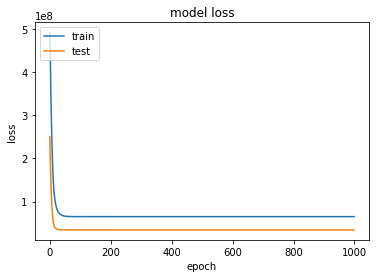

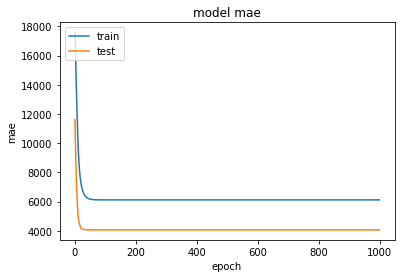

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###After seeing these plots we now know that our model won't improve any further if we increase the epochs' more than 70 epochs in the training process.

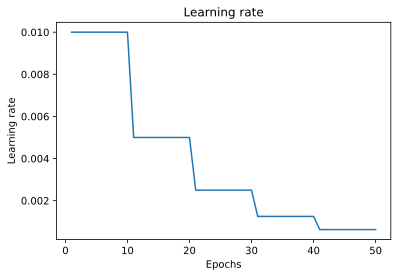

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

plot_lr(history)

##Data Mapping
##Predicting 

#Getting Predictions

In [ ]:
import numpy as np
X1=[[9122,6361,858,3060,81,970],[21642,17647,2264,2363,3509,2035],[10832,8282,897,788,643,1795]]
X2=[[21642,17647,2264,2363,3509,2035],[10832,8282,897,788,643,1795],[16075,15705,2511,536,2394,744]]
X3=[[10832,8282,897,788,643,1795],[16075,15705,2511,536,2394,744],[14425,10617,1759,1253,1428,1847]]
Y1=np.expand_dims(np.array(X1), axis=0)
Y2=np.expand_dims(np.array(X2), axis=0)
Y3=np.expand_dims(np.array(X3), axis=0)

In [ ]:
NValues=model1.predict(Y1)
NValues

array([[[30682.928 , 26903.994 ,  4111.6846,  3232.1406,  3732.1284,
          3187.7305],
        [32600.205 , 28670.365 ,  4224.6484,  3436.6924,  3770.1633,
          3345.9006],
        [30918.74  , 27240.533 ,  3936.5261,  3307.7507,  3468.1206,
          3189.0579]]], dtype=float32)

In [ ]:
[[30491.688 , 26676.016 ,  4063.4937,  3346.4314,  3698.3804, 3071.1804],
 [32609.338 , 28643.55  ,  4211.034 ,  3531.3645,  3766.8853, 3215.3186],
 [30792.037 , 27132.178 ,  3912.74  ,  3375.1172,  3466.1506, 3042.395 ]]

[[29753.455 , 26501.86  ,  4026.722 ,  3271.5115,  3664.1953, 3021.108 ],
 [32590.299 , 28991.906 ,  4208.7393,  3515.5303,  3768.6423, 3204.71  ],
 [30531.549 , 27169.04  ,  3902.5803,  3359.9434,  3441.3604, 3038.9927]]

[[30682.928 , 26903.994 ,  4111.6846,  3232.1406,  3732.1284, 3187.7305],
 [32600.205 , 28670.365 ,  4224.6484,  3436.6924,  3770.1633, 3345.9006],
 [30918.74  , 27240.533 ,  3936.5261,  3307.7507,  3468.1206, 3189.0579]]

In [ ]:
TP=[series[38],series[39],series[40]]
TP=np.expand_dims(np.array(TP), axis=0)
TP1=model1.predict(TP)
TP2=model1.predict(TP1)
TP3=model1.predict(TP2)
TP4=model1.predict(TP3)

In [ ]:
print(TP1)
print(TP2)
print(TP3)
print(TP4)

[[[30682.928  26903.994   4111.6846  3232.1406  3732.1284  3187.7305]
  [32600.205  28670.365   4224.6484  3436.6924  3770.1633  3345.9006]
  [30918.74   27240.533   3936.5261  3307.7507  3468.1206  3189.0579]]]
[[[30682.928  26903.994   4111.6846  3232.1406  3732.1284  3187.7305]
  [32600.205  28670.365   4224.6484  3436.6924  3770.1633  3345.9006]
  [30918.74   27240.533   3936.5261  3307.7507  3468.1206  3189.0579]]]
[[[30682.928  26903.994   4111.6846  3232.1406  3732.1284  3187.7305]
  [32600.205  28670.365   4224.6484  3436.6924  3770.1633  3345.9006]
  [30918.74   27240.533   3936.5261  3307.7507  3468.1206  3189.0579]]]
[[[30682.928  26903.994   4111.6846  3232.1406  3732.1284  3187.7305]
  [32600.205  28670.365   4224.6484  3436.6924  3770.1633  3345.9006]
  [30918.74   27240.533   3936.5261  3307.7507  3468.1206  3189.0579]]]


#Window to the improvements:
* Since the coroan affected the sales immensly, we can include it as a parameter in the inputs of the model.
* Since most of the products that Henkel sells are cleaning products, we can include the monthly average tempreture in the model.

In [ ]:
from tabulate import tabulate
T=[['The first product: P1','Nadhif HS REG 320 g'],['The second product: P2','Nadhif HS MS 320 g'],['The third product: P3','Dixan LS Reg 4 Kg'],['The fourth product: P4','Dixan LS Reg 5 Kg'],['The fifth product: P5','Dixan LS SDM 4 Kg'],['The sixth product: P6','Dixan LS SDM 5 Kg']]
print(tabulate(T,tablefmt='fancy_grid'))

╒════════════════════════╤═════════════════════╕
│ The first product: P1  │ Nadhif HS REG 320 g │
├────────────────────────┼─────────────────────┤
│ The second product: P2 │ Nadhif HS MS 320 g  │
├────────────────────────┼─────────────────────┤
│ The third product: P3  │ Dixan LS Reg 4 Kg   │
├────────────────────────┼─────────────────────┤
│ The fourth product: P4 │ Dixan LS Reg 5 Kg   │
├────────────────────────┼─────────────────────┤
│ The fifth product: P5  │ Dixan LS SDM 4 Kg   │
├────────────────────────┼─────────────────────┤
│ The sixth product: P6  │ Dixan LS SDM 5 Kg   │
╘════════════════════════╧═════════════════════╛
